# Import Libraries and Load Data

In [1]:
#Import the required Libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [3]:
### load the previous application dataset
df1=pd.read_csv(r"C:\Users\hp\Desktop\New folder\reference folder\ASSIGNMENT 2\previous_application.csv")

In [4]:
###load the application_data dataset

df3=pd.read_csv(r"C:\Users\hp\Desktop\New folder\reference folder\ASSIGNMENT 2\application_data.csv")


# Data Preprocessing

In [5]:
# Calculate the percentage of null values in each column
((df3.isnull().sum() / len(df3)) * 100).sort_values(ascending=False)

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

In [6]:
null_percentages=((df3.isnull().sum() / len(df3)) * 100)

# Handling Missing Data

In [7]:
# Create a list of columns with more than 45% null values
columns_to_drop = null_percentages[null_percentages > 45].index.tolist()

# Drop the identified columns from the DataFrame
df3.drop(columns=columns_to_drop, inplace=True)

In [8]:
# Calculate the percentage of null values in each column
((df3.isnull().sum() / len(df3)) * 100).sort_values(ascending=False)

OCCUPATION_TYPE                31.345545
EXT_SOURCE_3                   19.825307
AMT_REQ_CREDIT_BUREAU_YEAR     13.501631
AMT_REQ_CREDIT_BUREAU_QRT      13.501631
AMT_REQ_CREDIT_BUREAU_MON      13.501631
AMT_REQ_CREDIT_BUREAU_WEEK     13.501631
AMT_REQ_CREDIT_BUREAU_DAY      13.501631
AMT_REQ_CREDIT_BUREAU_HOUR     13.501631
NAME_TYPE_SUITE                 0.420148
OBS_30_CNT_SOCIAL_CIRCLE        0.332021
DEF_30_CNT_SOCIAL_CIRCLE        0.332021
OBS_60_CNT_SOCIAL_CIRCLE        0.332021
DEF_60_CNT_SOCIAL_CIRCLE        0.332021
EXT_SOURCE_2                    0.214626
AMT_GOODS_PRICE                 0.090403
AMT_ANNUITY                     0.003902
CNT_FAM_MEMBERS                 0.000650
DAYS_LAST_PHONE_CHANGE          0.000325
FLAG_DOCUMENT_17                0.000000
FLAG_DOCUMENT_18                0.000000
FLAG_DOCUMENT_21                0.000000
FLAG_DOCUMENT_20                0.000000
FLAG_DOCUMENT_19                0.000000
FLAG_DOCUMENT_2                 0.000000
FLAG_DOCUMENT_3 

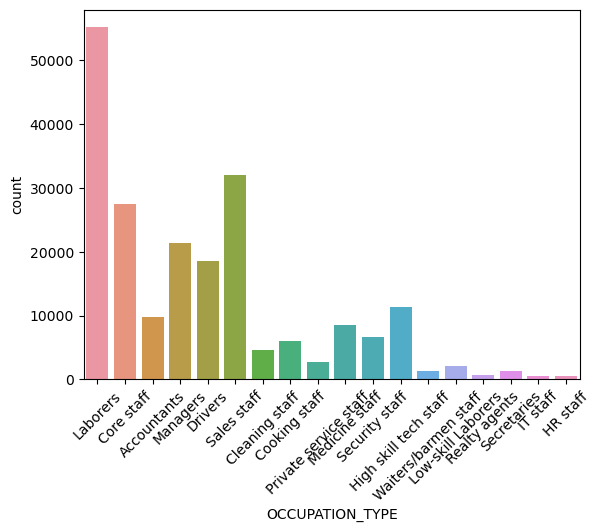

In [9]:
#Exploring the possible values for the null values in OCCUPATION_TYPE'

# plot a count plot for this purpose (univariate analysis)
sns.countplot(x='OCCUPATION_TYPE',data=df3)
plt.xticks(rotation=45)
plt.show()

The count plot represents the number of customers in various occupation categories, and it's evident that a significant portion of them falls under the "laborers" category. In simpler terms, a substantial proportion of the customers are employed in jobs categorized as "laborers".

In [10]:
df3['OCCUPATION_TYPE'] = df3['OCCUPATION_TYPE'].fillna('not_known')

For the time being, I am temporarily filling the missing values with the term "not_known" to facilitate more straight forward data analysis.

<Axes: ylabel='Frequency'>

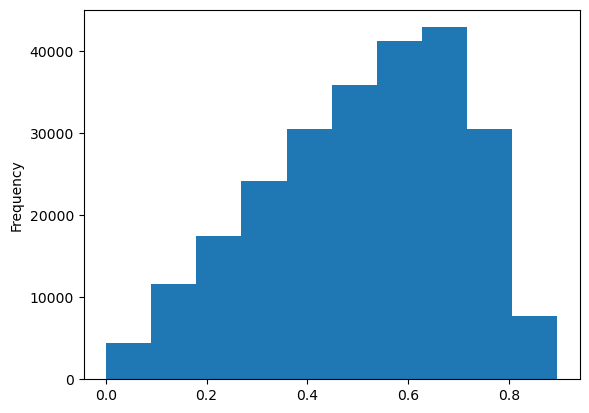

In [11]:
#Exploring the possible values for the null values in 'EXT_SOURCE_3'
df3['EXT_SOURCE_3'].plot.hist()

## Exploring the "TARGET" column

In [12]:
target_value_counts = df3['TARGET'].value_counts()

# Calculate the percentage of each value
target_percentages = target_value_counts / target_value_counts.sum() * 100

# Print the results
print(target_percentages)

0    91.927118
1     8.072882
Name: TARGET, dtype: float64


In [13]:
###To find the number of people who have high chances of defaulting
h=(df3.TARGET==1).sum()
print(h,"number ofpeople not capable of paying the loan")

24825 number ofpeople not capable of paying the loan


In [14]:
##To find number of peaple capable of paying the loans

i=h=(df3.TARGET==0).sum()
print(h,"number of people capable of paying the loan")

282686 number of people capable of paying the loan


#### Based on the values obtained above  for the target column, we can infer that approximately 91.9% of the applicants are prospective customers, making them a valuable target for a successful business.(i.e Value is 0)

In [15]:
df3.head()
#Go through the data for further cleaning,also notice the negative values presnt the days section

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


### Using the "NAME_CONTRACT_TYPE" column to find the of loan prefered by the potential coustumers

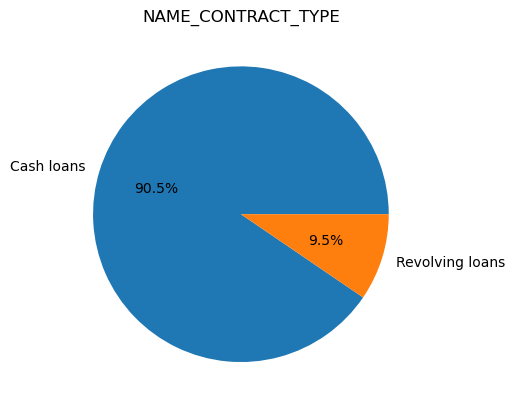

In [16]:
#Type of loan prefere by the potential coustumers
#Draw a piechart for NAME_CONTRACT_TYPE
name_contract_type_counts = df3['NAME_CONTRACT_TYPE'].value_counts()

# Get the pie chart slice labels
pie_chart_slice_labels = name_contract_type_counts.index.to_numpy()

# Remove slice labels beyond the top 15 to avoid labels overlapping
pie_chart_slice_labels[15:] = ''

# Get the pie chart slice values
pie_chart_slice_values = name_contract_type_counts.to_numpy()

# Create a pie chart of the NAME_CONTRACT_TYPE counts
plt.pie(pie_chart_slice_values, labels=pie_chart_slice_labels, autopct="%1.1f%%")
plt.title("NAME_CONTRACT_TYPE")
plt.show()

#### From the above graph we can conclude mjority of costumers prefer csh type loans

### Handling null values in 'AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_HOUR'columns


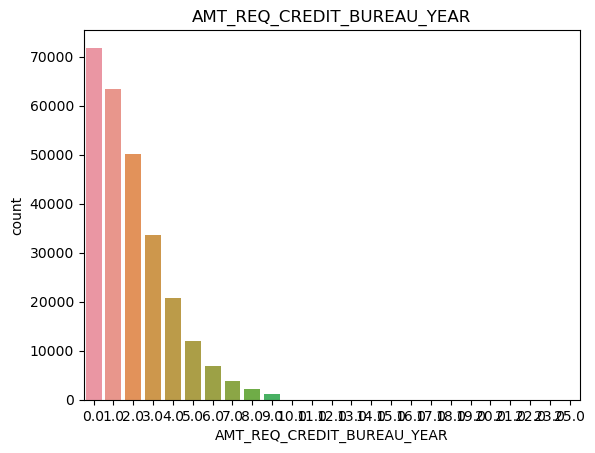

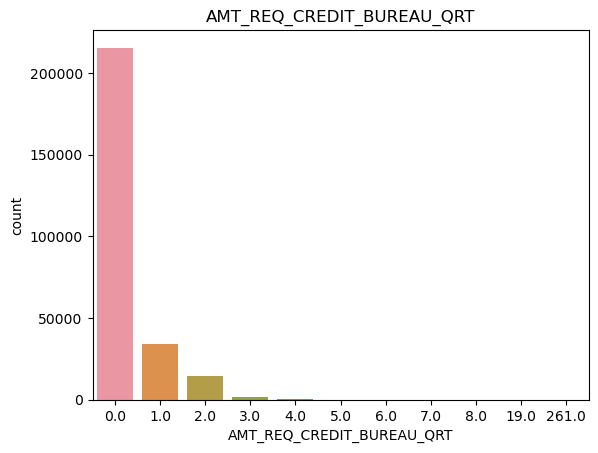

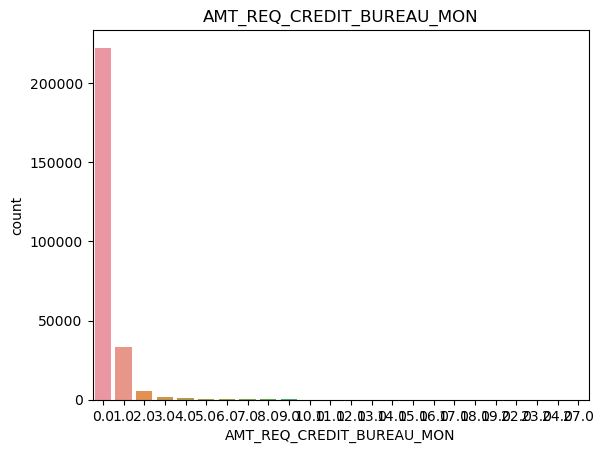

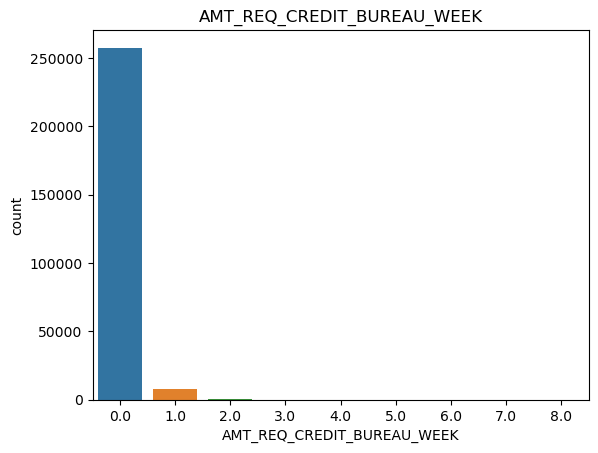

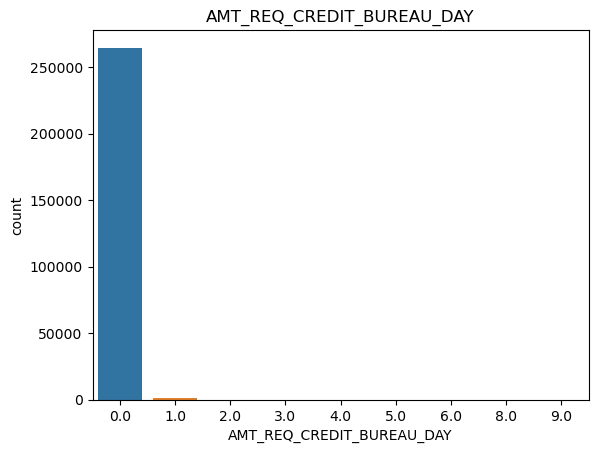

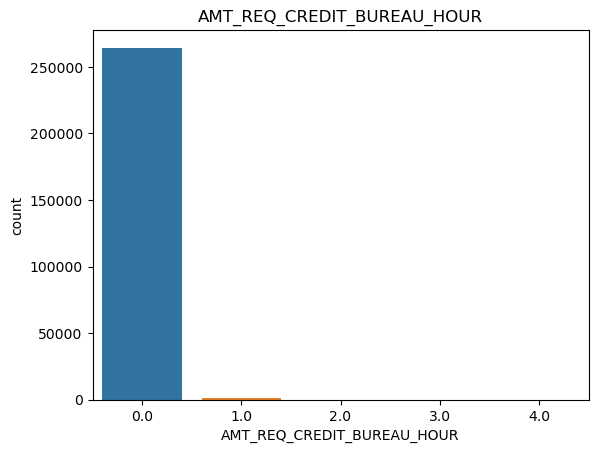

In [17]:
columns = ['AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_HOUR']

# Iterate over the columns and create a count plot for each column
for column in columns:
    sns.countplot(x=column, data=df3)
    plt.title(column)
    plt.show()

From the above we can infer that max values tend to be zero let us replace the null values with the mode value in each column of the above columns with mode.

In [18]:
thelist = ['AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_HOUR',]

# Iterate over the columns in thelist and replace the NaN values with the mode
for column in thelist:
    df3[column].fillna(df3[column].mode()[0], inplace=True)

###  Asuming that the clients  social circle as not defaulted on loans.Fill null values with zero.

In [19]:
df3.OBS_30_CNT_SOCIAL_CIRCLE.fillna(0, inplace=True)
df3.DEF_30_CNT_SOCIAL_CIRCLE.fillna(0, inplace=True)
df3.OBS_60_CNT_SOCIAL_CIRCLE.fillna(0, inplace=True)
df3.DEF_60_CNT_SOCIAL_CIRCLE.fillna(0, inplace=True)

### Assume no phone was changed ,external points is 0,client has  no family member  and no loan annuity is present currently.

In [20]:
df3.CNT_FAM_MEMBERS.fillna(0, inplace=True)
df3.DAYS_LAST_PHONE_CHANGE.fillna(0, inplace=True)
df3.EXT_SOURCE_2.fillna(0, inplace=True)
df3.EXT_SOURCE_3.fillna(0, inplace=True)
df3.AMT_GOODS_PRICE.fillna(0, inplace=True)
df3.AMT_ANNUITY.fillna(0, inplace=True)

### Handling the null values in the NAME_TYPE_SUITE column (Who was accompanying client when he was applying for the loan)

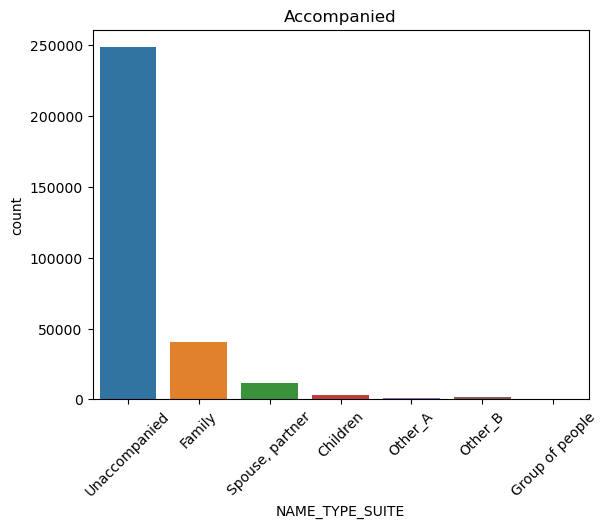

In [21]:
sns.countplot(x='NAME_TYPE_SUITE', data=df3)
plt.title('Accompanied')
plt.xticks(rotation=45)
plt.show()

In [22]:
# Fill the null values in the NAME_TYPE_SUITE column with Unaccompanied as majoity of the clients where unaccompanied during loan application
df3['NAME_TYPE_SUITE'].fillna('Unaccompanied', inplace=True)

## Recheck for null values in the  application dataset,

In [23]:
# Calculate the percentage of null values in each column
((df3.isnull().sum() / len(df3)) * 100).sort_values(ascending=False)

SK_ID_CURR                     0.0
REG_CITY_NOT_WORK_CITY         0.0
FLAG_DOCUMENT_8                0.0
FLAG_DOCUMENT_7                0.0
FLAG_DOCUMENT_6                0.0
FLAG_DOCUMENT_5                0.0
FLAG_DOCUMENT_4                0.0
FLAG_DOCUMENT_3                0.0
FLAG_DOCUMENT_2                0.0
DAYS_LAST_PHONE_CHANGE         0.0
DEF_60_CNT_SOCIAL_CIRCLE       0.0
OBS_60_CNT_SOCIAL_CIRCLE       0.0
DEF_30_CNT_SOCIAL_CIRCLE       0.0
OBS_30_CNT_SOCIAL_CIRCLE       0.0
EXT_SOURCE_3                   0.0
EXT_SOURCE_2                   0.0
ORGANIZATION_TYPE              0.0
FLAG_DOCUMENT_9                0.0
FLAG_DOCUMENT_10               0.0
FLAG_DOCUMENT_11               0.0
FLAG_DOCUMENT_20               0.0
AMT_REQ_CREDIT_BUREAU_QRT      0.0
AMT_REQ_CREDIT_BUREAU_MON      0.0
AMT_REQ_CREDIT_BUREAU_WEEK     0.0
AMT_REQ_CREDIT_BUREAU_DAY      0.0
AMT_REQ_CREDIT_BUREAU_HOUR     0.0
FLAG_DOCUMENT_21               0.0
FLAG_DOCUMENT_19               0.0
FLAG_DOCUMENT_12    

## To convert the number of days into a positive value

In [24]:
columns_to_convert = ["DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION", "DAYS_ID_PUBLISH", "DAYS_LAST_PHONE_CHANGE"]

# Use the abs() function to convert the columns to positive values
df3[columns_to_convert] = df3[columns_to_convert].abs()

### Explore the CODE_GENDER (Gender of the client)

In [25]:
df3['CODE_GENDER'].unique()

array(['M', 'F', 'XNA'], dtype=object)

#### AS SEEN ABOVE APPART FROM 'M' AND'F' THERE'S ONE MORE CATEGORY 'XNA'.LET US REPLCE IT WIT THE MOST COMMAN GENDER IN THE DATASET

In [26]:
most_common_gender = df3['CODE_GENDER'].mode()[0]
df3['CODE_GENDER'] = df3['CODE_GENDER'].replace('XNA', most_common_gender)

## Gender distribution amongst the applicants.

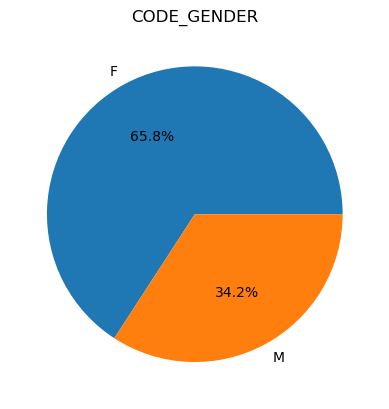

In [27]:
#Draw a piechart for Code_gender
gender_counts = df3['CODE_GENDER'].value_counts()

# Get the pie chart slice labels
pie_chart_slice_labels = gender_counts.index.to_numpy()

# Remove slice labels beyond the top 15 to avoid labels overlapping
pie_chart_slice_labels[15:] = ''

# Get the pie chart slice values
pie_chart_slice_values = gender_counts.to_numpy()

# Create a pie chart of the CODE_GENDER counts
plt.pie(pie_chart_slice_values, labels=pie_chart_slice_labels, autopct="%1.1f%%")
plt.title("CODE_GENDER")
plt.show()

## INSIGHT 
Majority of the costumers applying for loans are female (i.e 65.8%).

## Handling the missing values in OCCUPATION_TYPE.

In [28]:
# Find the rows where occupation_type is "not_known"
idx = df3[df3['OCCUPATION_TYPE'] == 'not_known'].index

# Create a new dataset from df3 containing only the rows where occupation_type is "missing" and the columns 'NAME_INCOME_TYPE' and 'ORGANIZATION_TYPE'
df_new = df3.loc[idx, ['NAME_INCOME_TYPE', 'ORGANIZATION_TYPE']]
print(df_new.head(30))
df_new['NAME_INCOME_TYPE'].value_counts()

         NAME_INCOME_TYPE       ORGANIZATION_TYPE
8               Pensioner                     XNA
11              Pensioner                     XNA
23              Pensioner                     XNA
28          State servant                Military
30   Commercial associate  Business Entity Type 3
38              Pensioner                     XNA
43              Pensioner                     XNA
44                Working  Business Entity Type 3
46              Pensioner                     XNA
52                Working               Emergency
54              Pensioner                     XNA
56              Pensioner                     XNA
62              Pensioner                     XNA
63                Working              University
76   Commercial associate                  School
79              Pensioner                     XNA
81              Pensioner                     XNA
82                Working  Business Entity Type 3
84              Pensioner                     XNA


Pensioner               55357
Working                 24920
Commercial associate    12297
State servant            3787
Unemployed                 22
Student                     5
Businessman                 2
Maternity leave             1
Name: NAME_INCOME_TYPE, dtype: int64

In [29]:
pensioner_rows = df_new[df_new['NAME_INCOME_TYPE'] == 'Pensioner']
pensioner_rows.head(30)


,NAME_INCOME_TYPE,ORGANIZATION_TYPE
8,Pensioner,XNA
11,Pensioner,XNA
23,Pensioner,XNA
38,Pensioner,XNA
43,Pensioner,XNA
46,Pensioner,XNA
54,Pensioner,XNA
56,Pensioner,XNA
62,Pensioner,XNA
79,Pensioner,XNA


### Let us use the Pensioner value to replace the coressponding missing values in the occpation_type column for which income type is pesnion

In [30]:
df3['OCCUPATION_TYPE'] = np.where((df3['OCCUPATION_TYPE'] == 'not_known') & (df3['NAME_INCOME_TYPE'] == 'Pensioner'), 'Pensioner', df3['OCCUPATION_TYPE'])

### Since majority of "Pensioner" value is approximately equal to null values in ORGANIZATION_TYPE column.Replace the mising values in the ORGANIZATION_TYPE as "Pensioner"

In [31]:

df3['ORGANIZATION_TYPE'] = df3['ORGANIZATION_TYPE'].replace('XNA', 'Pensioner')

## Final check for null values

In [32]:
# Calculate the percentage of null values in each column
((df3.isnull().sum() / len(df3)) * 100).sort_values(ascending=False)

SK_ID_CURR                     0.0
REG_CITY_NOT_WORK_CITY         0.0
FLAG_DOCUMENT_8                0.0
FLAG_DOCUMENT_7                0.0
FLAG_DOCUMENT_6                0.0
FLAG_DOCUMENT_5                0.0
FLAG_DOCUMENT_4                0.0
FLAG_DOCUMENT_3                0.0
FLAG_DOCUMENT_2                0.0
DAYS_LAST_PHONE_CHANGE         0.0
DEF_60_CNT_SOCIAL_CIRCLE       0.0
OBS_60_CNT_SOCIAL_CIRCLE       0.0
DEF_30_CNT_SOCIAL_CIRCLE       0.0
OBS_30_CNT_SOCIAL_CIRCLE       0.0
EXT_SOURCE_3                   0.0
EXT_SOURCE_2                   0.0
ORGANIZATION_TYPE              0.0
FLAG_DOCUMENT_9                0.0
FLAG_DOCUMENT_10               0.0
FLAG_DOCUMENT_11               0.0
FLAG_DOCUMENT_20               0.0
AMT_REQ_CREDIT_BUREAU_QRT      0.0
AMT_REQ_CREDIT_BUREAU_MON      0.0
AMT_REQ_CREDIT_BUREAU_WEEK     0.0
AMT_REQ_CREDIT_BUREAU_DAY      0.0
AMT_REQ_CREDIT_BUREAU_HOUR     0.0
FLAG_DOCUMENT_21               0.0
FLAG_DOCUMENT_19               0.0
FLAG_DOCUMENT_12    

# Now let us clean the previous_applications dataset ##


In [33]:
df1.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


### Calculating  the percentage of null values in each columnalongwith the data type.

In [34]:
# Calculate the percentage of null values in each column
missing_values = df1.isnull().sum()

# Get the total number of rows in the df1 DataFrame
total_rows = len(df1)

# Calculate the percentage of missing values in each column
missing_values_percentage = (missing_values / total_rows) * 100

# Get the datatypes of the columns in the df1 DataFrame
datatypes = df1.dtypes

# Create a new DataFrame with the missing values and datatypes
missing_values_df = pd.DataFrame({'Missing Values (%)': missing_values_percentage, 'Datatype': datatypes})

# Sort the DataFrame by the missing values in descending order
missing_values_df = missing_values_df.sort_values(by='Missing Values (%)', ascending=False)

# Display the DataFrame
print(missing_values_df)

                             Missing Values (%) Datatype
RATE_INTEREST_PRIVILEGED              99.643698  float64
RATE_INTEREST_PRIMARY                 99.643698  float64
AMT_DOWN_PAYMENT                      53.636480  float64
RATE_DOWN_PAYMENT                     53.636480  float64
NAME_TYPE_SUITE                       49.119754   object
NFLAG_INSURED_ON_APPROVAL             40.298129  float64
DAYS_TERMINATION                      40.298129  float64
DAYS_LAST_DUE                         40.298129  float64
DAYS_LAST_DUE_1ST_VERSION             40.298129  float64
DAYS_FIRST_DUE                        40.298129  float64
DAYS_FIRST_DRAWING                    40.298129  float64
AMT_GOODS_PRICE                       23.081773  float64
AMT_ANNUITY                           22.286665  float64
CNT_PAYMENT                           22.286366  float64
PRODUCT_COMBINATION                    0.020716   object
AMT_CREDIT                             0.000060  float64
NAME_YIELD_GROUP               

## Data cleaning.

### Dropping columns  having more than 50% null values

In [35]:
# Create a list of columns with more than 50% null values
null_top_value=((df1.isnull().sum() / len(df1)) * 100)
columns_drop = null_top_value[null_top_value > 50].index.tolist()

# Drop the identified columns from the DataFrame
df1.drop(columns=columns_drop, inplace=True)

In [36]:
# Calculate the percentage of null values in each column
((df1.isnull().sum() / len(df1)) * 100).sort_values(ascending=False)

NAME_TYPE_SUITE                49.119754
DAYS_FIRST_DRAWING             40.298129
DAYS_TERMINATION               40.298129
DAYS_LAST_DUE                  40.298129
DAYS_LAST_DUE_1ST_VERSION      40.298129
DAYS_FIRST_DUE                 40.298129
NFLAG_INSURED_ON_APPROVAL      40.298129
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_APPLICATION                 0.000000
NAME_YIELD_GROUP                0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
NAME_PORTFOLIO                  0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE                0.000000
SK_ID_CURR      

In [37]:


df1.head(20)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,1,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,1,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,1,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,1,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
5,1383531,199383,Cash loans,23703.930,315000.0,340573.5,315000.0,SATURDAY,8,Y,1,Everyday expenses,Approved,-684,Cash through the bank,XAP,Family,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,18.0,low_normal,Cash X-Sell: low,365243.0,-654.0,-144.0,-144.0,-137.0,1.0
6,2315218,175704,Cash loans,NaN,0.0,0.0,NaN,TUESDAY,11,Y,1,XNA,Canceled,-14,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
7,1656711,296299,Cash loans,NaN,0.0,0.0,NaN,MONDAY,7,Y,1,XNA,Canceled,-21,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
8,2367563,342292,Cash loans,NaN,0.0,0.0,NaN,MONDAY,15,Y,1,XNA,Canceled,-386,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
9,2579447,334349,Cash loans,NaN,0.0,0.0,NaN,SATURDAY,15,Y,1,XNA,Canceled,-57,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN


### Further going through the dataset we can observe presence of few null values and also negative values in the days column

### Fill missing values with "not updated" in name_type_suite.

In [38]:

df1['NAME_TYPE_SUITE'].fillna('not updated', inplace=True)

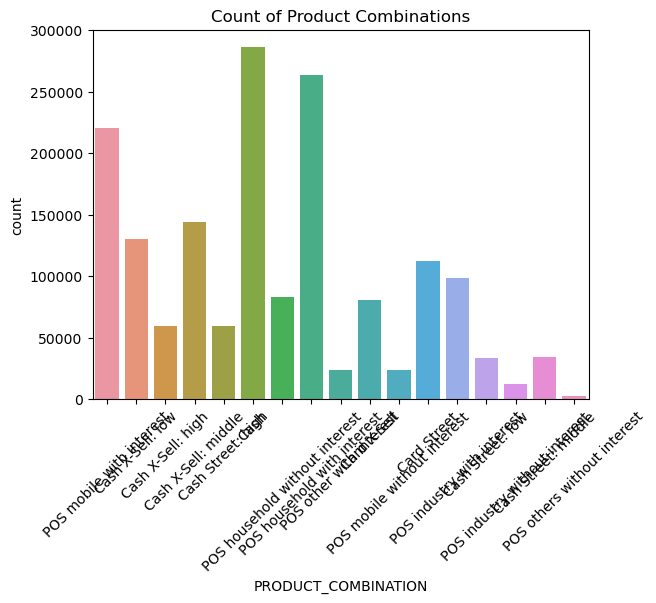

In [39]:
sns.countplot(data=df1,x='PRODUCT_COMBINATION')
plt.title("Count of Product Combinations")
plt.xticks(rotation=45)
plt.show()

## Insight
"Cash" mode seems to be the most bought products 

In [40]:
# Fill missing values in df1['PRODUCT_COMBINATION'] with the mode;
mode_product_combination = df1['PRODUCT_COMBINATION'].mode()[0]
df1['PRODUCT_COMBINATION'].fillna(mode_product_combination, inplace=True)


## Changing the negatives days to positive value.

In [41]:
columns_to_abs = ['DAYS_TERMINATION', 'DAYS_LAST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_FIRST_DUE', 'DAYS_FIRST_DRAWING', 'SELLERPLACE_AREA','DAYS_DECISION']
# Apply the absolute function to specified columns
df1[columns_to_abs] = df1[columns_to_abs].abs()

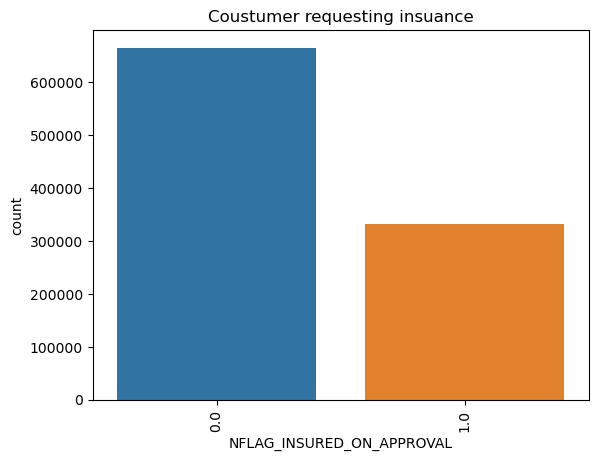

In [42]:
sns.countplot(data=df1,x='NFLAG_INSURED_ON_APPROVAL')
plt.title("Coustumer requesting insuance")
plt.xticks(rotation=90)
plt.show()

## From the above graph we can see that 1/3rd of the costumers requested for insurance during the previous application

# Detecting outlier 

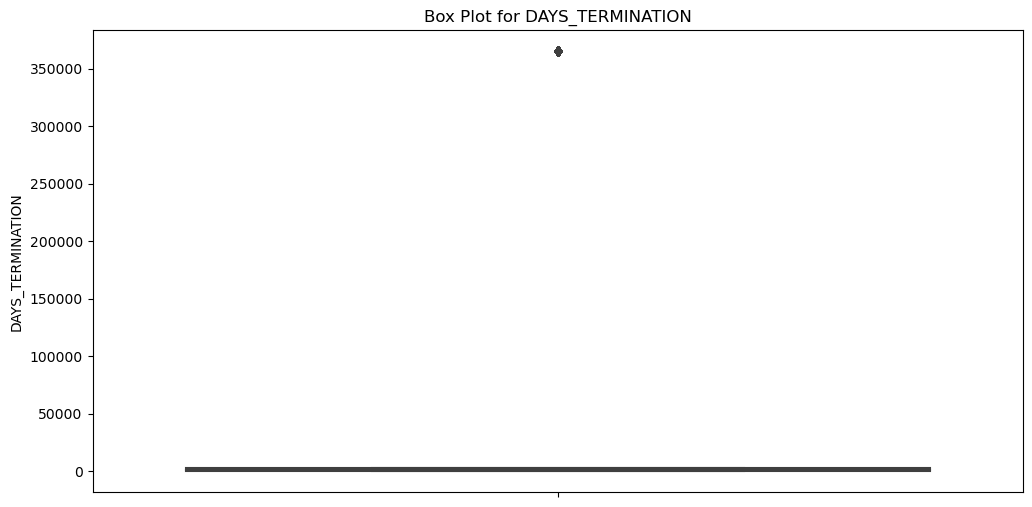

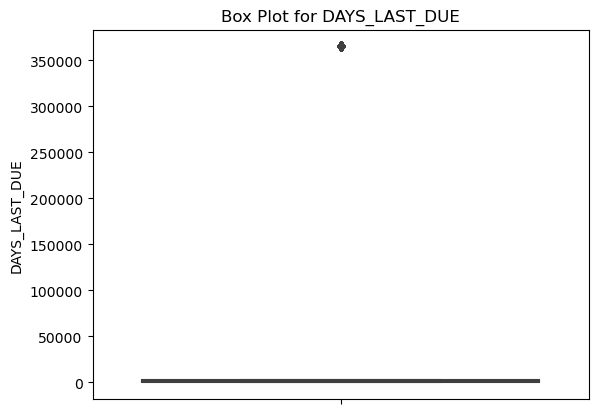

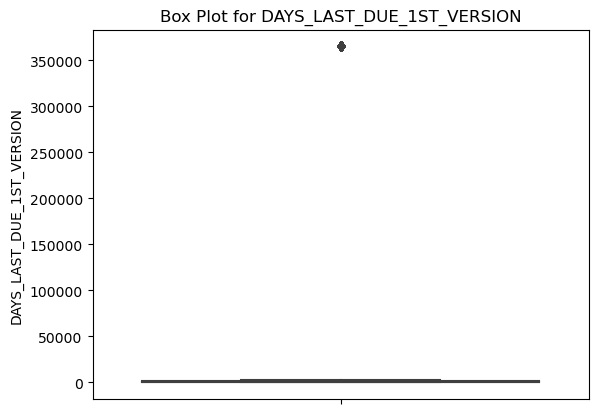

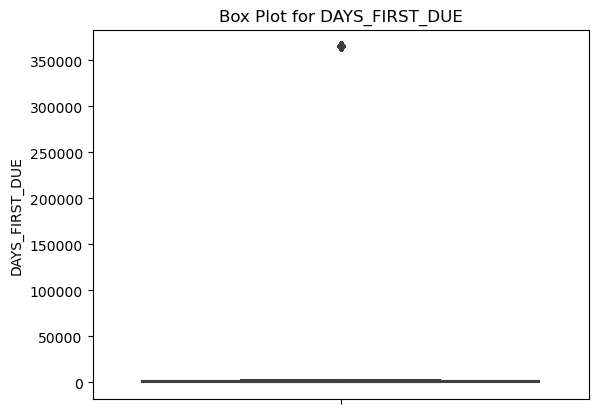

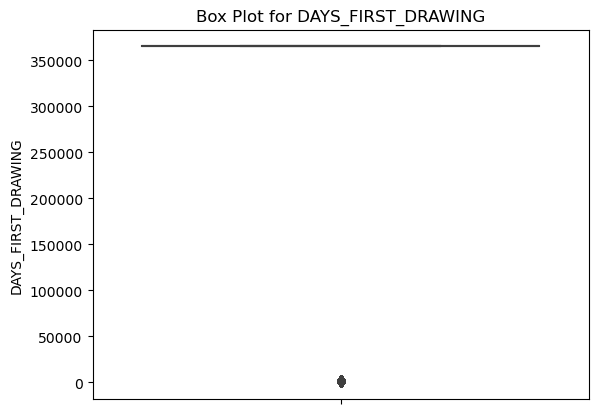

In [43]:
columns_to_plot = ['DAYS_TERMINATION', 'DAYS_LAST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_FIRST_DUE', 'DAYS_FIRST_DRAWING']

# Create a box plot for each of the specified columns
plt.figure(figsize=(12, 6))
for column in columns_to_plot:
    sns.boxplot(data=df1, y=column)
    plt.title(f"Box Plot for {column}")
    plt.show()

## Outlier
From the above graph it is clear that there are outlier.The 'DAYS_TERMINATION', 'DAYS_LAST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_FIRST_DUE' have upper outlier and 'DAYS_FIRST_DRAWING' haslower outlier.


In [44]:
df1.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,1.284699e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,2.278473e+05,1.248418e+01,9.964675e-01,8.806797e+02,3.148644e+02,1.605408e+01,342340.056543,15949.224065,35163.363265,78152.730207,83505.775017,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,3.153966e+05,3.334028e+00,5.932963e-02,7.790997e+02,7.127403e+03,1.456729e+01,88413.495220,72007.270877,106405.950190,148833.342466,152484.418802,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2.000000,2.000000,0.000000,2.000000,2.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,5.084100e+04,1.000000e+01,1.000000e+00,2.800000e+02,1.000000e+00,6.000000e+00,365243.000000,475.000000,257.000000,455.000000,447.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.123200e+05,1.200000e+01,1.000000e+00,5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,921.000000,741.000000,1155.000000,1171.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,2.340000e+05,1.500000e+01,1.000000e+00,1.300000e+03,8.200000e+01,2.400000e+01,365243.000000,1825.000000,1735.000000,2418.000000,2501.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,6.905160e+06,2.300000e+01,1.000000e+00,2.922000e+03,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [45]:
    df1.head(20)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,73,Cash through the bank,XAP,not updated,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,42.0,300.0,42.0,37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,1,XNA,Approved,164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,1,XNA,Approved,301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,1,XNA,12.0,high,Cash X-Sell: high,365243.0,271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,1,XNA,Approved,512,Cash through the bank,XAP,not updated,Repeater,XNA,Cash,x-sell,Credit and cash offices,1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,482.0,152.0,182.0,177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,1,Repairs,Refused,781,Cash through the bank,HC,not updated,Repeater,XNA,Cash,walk-in,Credit and cash offices,1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
5,1383531,199383,Cash loans,23703.930,315000.0,340573.5,315000.0,SATURDAY,8,Y,1,Everyday expenses,Approved,684,Cash through the bank,XAP,Family,Repeater,XNA,Cash,x-sell,Credit and cash offices,1,XNA,18.0,low_normal,Cash X-Sell: low,365243.0,654.0,144.0,144.0,137.0,1.0
6,2315218,175704,Cash loans,NaN,0.0,0.0,NaN,TUESDAY,11,Y,1,XNA,Canceled,14,XNA,XAP,not updated,Repeater,XNA,XNA,XNA,Credit and cash offices,1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
7,1656711,296299,Cash loans,NaN,0.0,0.0,NaN,MONDAY,7,Y,1,XNA,Canceled,21,XNA,XAP,not updated,Repeater,XNA,XNA,XNA,Credit and cash offices,1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
8,2367563,342292,Cash loans,NaN,0.0,0.0,NaN,MONDAY,15,Y,1,XNA,Canceled,386,XNA,XAP,not updated,Repeater,XNA,XNA,XNA,Credit and cash offices,1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
9,2579447,334349,Cash loans,NaN,0.0,0.0,NaN,SATURDAY,15,Y,1,XNA,Canceled,57,XNA,XAP,not updated,Repeater,XNA,XNA,XNA,Credit and cash offices,1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN


### Handling the remaining the null values.

In [46]:
# Columns to fill with mode
columns_to_fill_with_mode = [
    'NFLAG_INSURED_ON_APPROVAL',
    'DAYS_TERMINATION',
    'DAYS_LAST_DUE',
    'DAYS_LAST_DUE_1ST_VERSION',
    'DAYS_FIRST_DUE',
    'DAYS_FIRST_DRAWING',
    'AMT_GOODS_PRICE',
    'AMT_ANNUITY',
    'CNT_PAYMENT',
    'AMT_CREDIT'
]

# Fill the specified columns with their modes
for column_name in columns_to_fill_with_mode:
    mode_value = df1[column_name].mode().iloc[0]  # Get the mode value
    df1[column_name].fillna(mode_value, inplace=True)

In [47]:
    df1.isnull().sum()

SK_ID_PREV                     0
SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_ANNUITY                    0
AMT_APPLICATION                0
AMT_CREDIT                     0
AMT_GOODS_PRICE                0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
FLAG_LAST_APPL_PER_CONTRACT    0
NFLAG_LAST_APPL_IN_DAY         0
NAME_CASH_LOAN_PURPOSE         0
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
NAME_PAYMENT_TYPE              0
CODE_REJECT_REASON             0
NAME_TYPE_SUITE                0
NAME_CLIENT_TYPE               0
NAME_GOODS_CATEGORY            0
NAME_PORTFOLIO                 0
NAME_PRODUCT_TYPE              0
CHANNEL_TYPE                   0
SELLERPLACE_AREA               0
NAME_SELLER_INDUSTRY           0
CNT_PAYMENT                    0
NAME_YIELD_GROUP               0
PRODUCT_COMBINATION            0
DAYS_FIRST_DRAWING             0
DAYS_FIRST_DUE                 0
DAYS_LAST_DUE_1ST_VERSION      0
DAYS_LAST_

In [48]:
merged=df3.merge(df1,left_on='SK_ID_CURR',right_on='SK_ID_CURR')

In [49]:
merged.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_y,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1038818,Consumer loans,9251.775,179055.0,179055.0,179055.0,SATURDAY,9,Y,1,XAP,Approved,606,XNA,XAP,not updated,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest,365243.0,565.0,125.0,25.0,17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.000000,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1810518,Cash loans,98356.995,900000.0,1035882.0,900000.0,FRIDAY,12,Y,1,XNA,Approved,746,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,1,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,716.0,386.0,536.0,527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.000000,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2636178,Consumer loans,64567.665,337500.0,348637.5,337500.0,SUNDAY,17,Y,1,XAP,Approved,828,Cash through the bank,XAP,Family,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest,365243.0,797.0,647.0,647.0,639.0,0.0
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.000000,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.

In [153]:
merged.isnull().sum()

SK_ID_PREV                      0
SK_ID_CURR                      0
NAME_CONTRACT_TYPE_x            0
AMT_ANNUITY_x                   0
AMT_APPLICATION                 0
AMT_CREDIT_x                    0
AMT_GOODS_PRICE_x               0
WEEKDAY_APPR_PROCESS_START_x    0
HOUR_APPR_PROCESS_START_x       0
FLAG_LAST_APPL_PER_CONTRACT     0
NFLAG_LAST_APPL_IN_DAY          0
NAME_CASH_LOAN_PURPOSE          0
NAME_CONTRACT_STATUS            0
DAYS_DECISION                   0
NAME_PAYMENT_TYPE               0
CODE_REJECT_REASON              0
NAME_TYPE_SUITE_x               0
NAME_CLIENT_TYPE                0
NAME_GOODS_CATEGORY             0
NAME_PORTFOLIO                  0
NAME_PRODUCT_TYPE               0
CHANNEL_TYPE                    0
SELLERPLACE_AREA                0
NAME_SELLER_INDUSTRY            0
CNT_PAYMENT                     0
NAME_YIELD_GROUP                0
PRODUCT_COMBINATION             0
DAYS_FIRST_DRAWING              0
DAYS_FIRST_DUE                  0
DAYS_LAST_DUE_

In [50]:
merged.shape

(1413701, 105)

In [51]:
df3.shape

(307511, 73)

In [52]:
df1.shape

(1670214, 33)

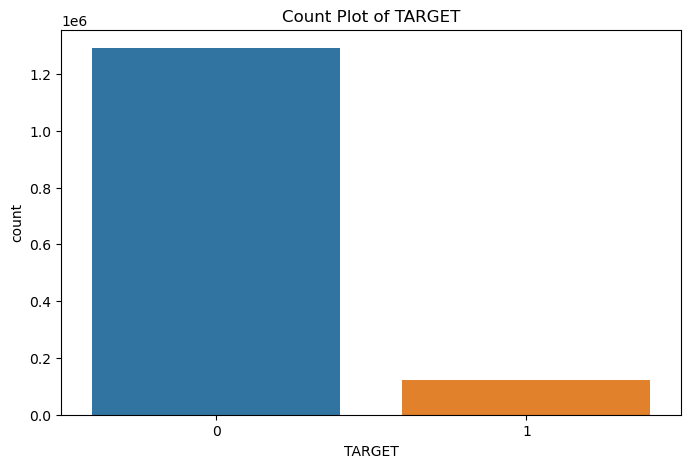

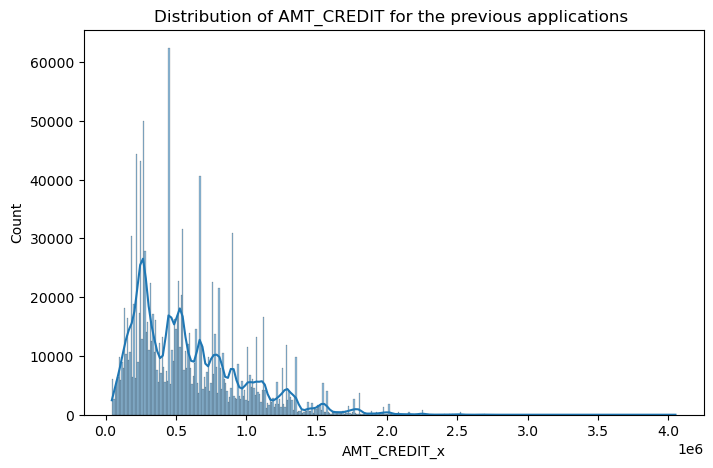

In [54]:
# Count plot for 'TARGET' variable
plt.figure(figsize=(8, 5))
sns.countplot(data=merged, x='TARGET')
plt.title("Count Plot of TARGET")
plt.show()


##To get a visual idea of how the credit was distributed for the  costumer the previous time
plt.figure(figsize=(8, 5))
sns.histplot(data=merged, x='AMT_CREDIT_x', kde=True)
plt.title("Distribution of AMT_CREDIT for the previous applications ")
plt.show()


#### Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)
.It also shows that the there is a huge imbalnce in the target class.
### Majority of the credits distributed lie between 0.1 and 1.5,and after 0.5 there is less reduction in the number of people taking loan

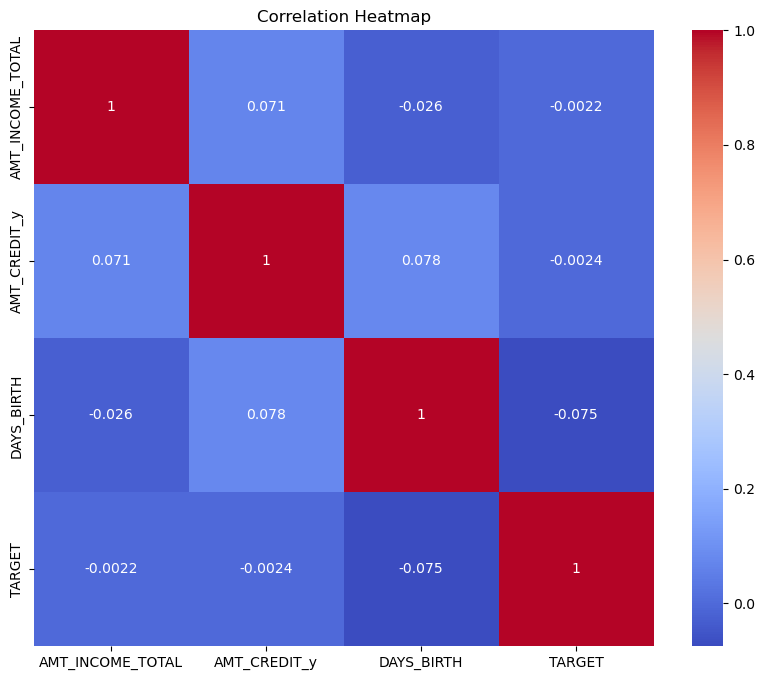

In [55]:
# Select the columns of interest
columns_of_interest = ['AMT_INCOME_TOTAL','AMT_CREDIT_y','DAYS_BIRTH','TARGET',]

# Create a subset of the merged DataFrame with these columns
subset = merged[columns_of_interest]

# Generate a correlation matrix for the selected columns
correlation_matrix = subset.corr()

# Create a heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True)
plt.title("Correlation Heatmap")
plt.show()

## Insight
There is no strong trends ,but as the income increase the amount credited has increased.And as the age increased the income has reduced.

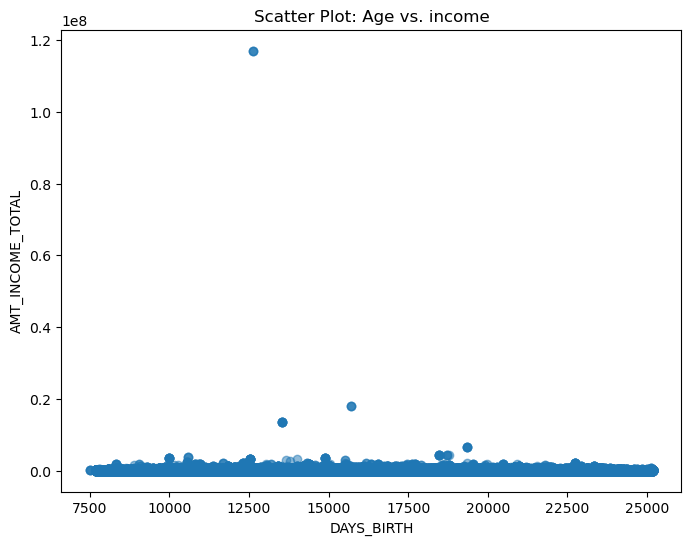

In [56]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(merged['DAYS_BIRTH'], merged['AMT_INCOME_TOTAL'], alpha=0.5)
plt.title("Scatter Plot: Age vs. income")
plt.xlabel("DAYS_BIRTH")
plt.ylabel("AMT_INCOME_TOTAL")
plt.show()

## Insight
Above plotted scatter plot shows the trend between age and income,and also an outlier in the annual income is spotted.Outlier can be handled but it will reults in deletion of a potential costumer(information loss).
STEPS THAT CAN BE DONE,You can impute missing or extreme values with the mean, median, or another statistically derived value. This can be useful when you want to preserve the structure of your dataset but reduce the impact of outliers.


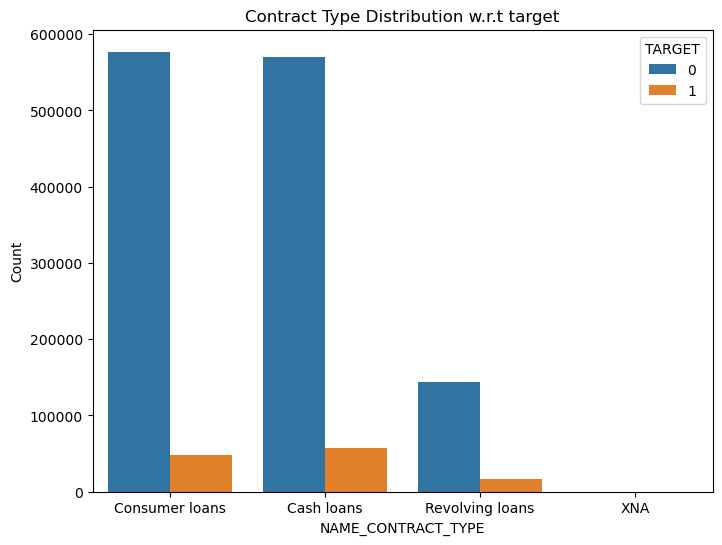

In [57]:
# Countplot for 'NAME_CONTRACT_TYPE' split by 'TARGET'
plt.figure(figsize=(8, 6))
sns.countplot(data=merged, x='NAME_CONTRACT_TYPE_y', hue='TARGET')
plt.title("Contract Type Distribution w.r.t target")
plt.xlabel("NAME_CONTRACT_TYPE")
plt.ylabel("Count")

plt.show()

 ## Insight
 Majority of the loan is of Cash type,and also there are defaulters in both category.

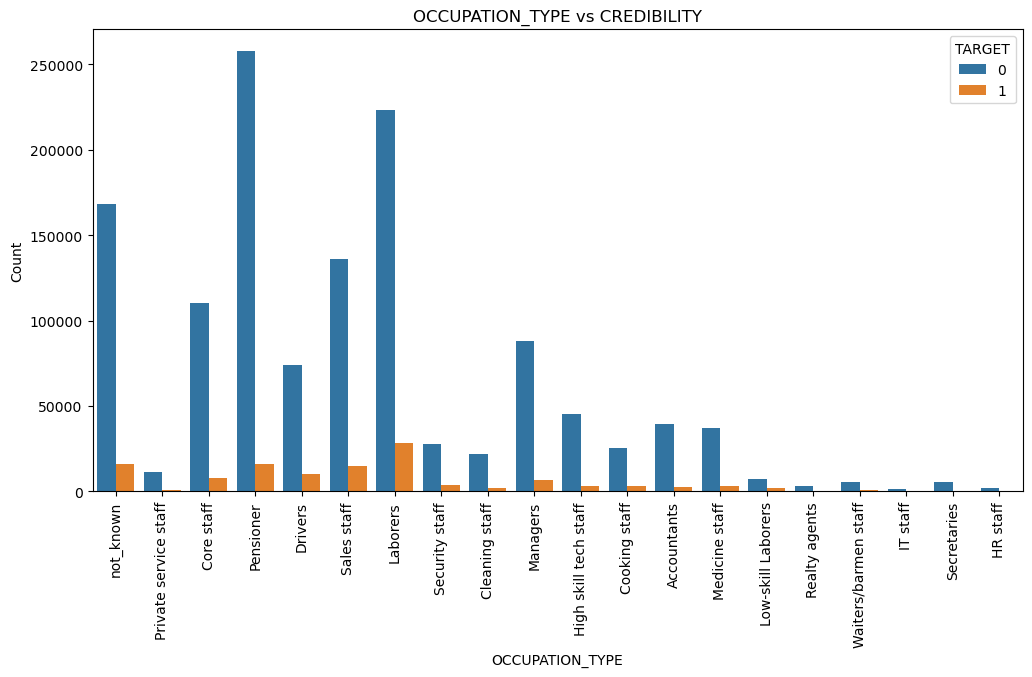

In [171]:
    # Countplot for 'OCCUPATION_TYPE' split by 'TARGET'
plt.figure(figsize=(12, 6))
sns.countplot(data=merged, x='OCCUPATION_TYPE', hue='TARGET')
plt.title("OCCUPATION_TYPE vs CREDIBILITY")
plt.xlabel("OCCUPATION_TYPE")
plt.ylabel("Count")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

## Insight
From the graph we can conclude that pensioner have been good costumers to the bank and laborers are the once who have defaulted the most.

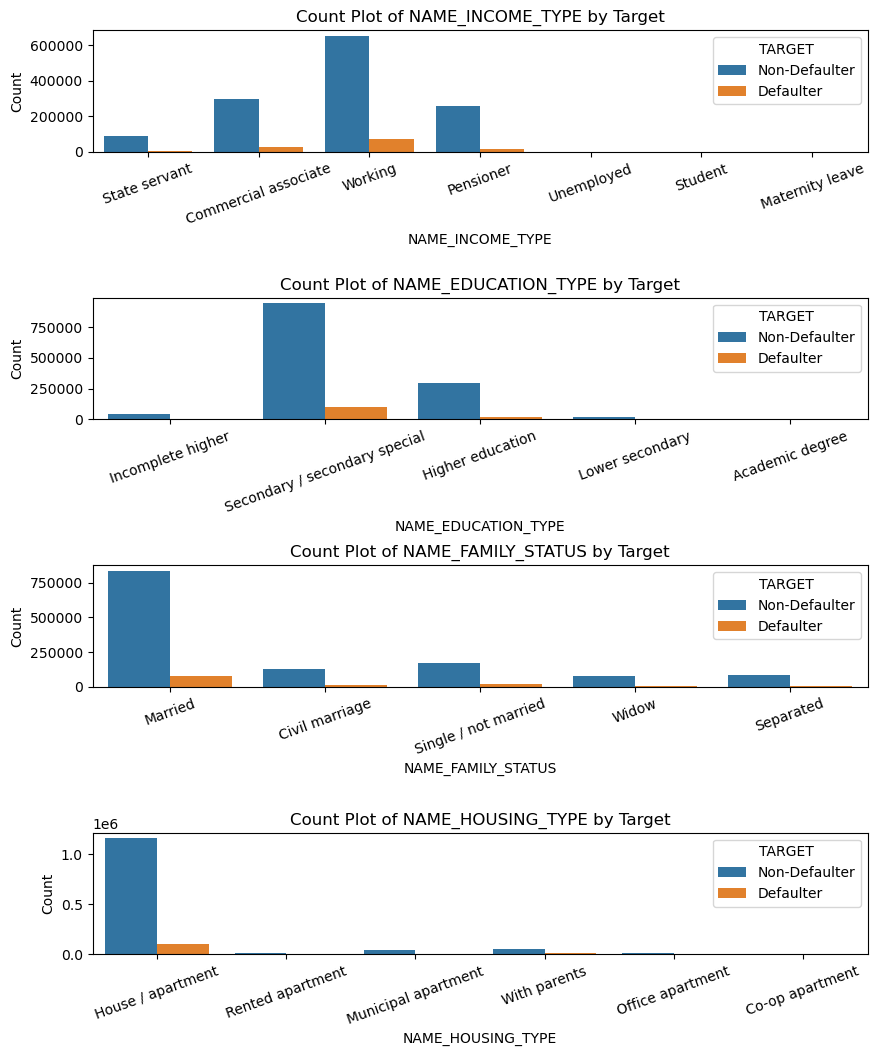

In [208]:
categorical_variables = ['NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE']

# Create subplots to display multiple count plots
fig, axes = plt.subplots(len(categorical_variables), 1, figsize=(10, 12))
plt.subplots_adjust(hspace=1.2)

for i, var in enumerate(categorical_variables):
    sns.countplot(data=merged, x=var, hue='TARGET', ax=axes[i])
    axes[i].set_title(f'Count Plot of {var} by Target')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Count')
    axes[i].legend(title='TARGET', labels=['Non-Defaulter', 'Defaulter'])
    axes[i].tick_params(axis='x', labelrotation=20)  # Rotate x-axis labels

plt.show()


# Insights
In the  above bar chart,  

1)Clients who are employed in Working, Commercial associate,State servent and Pensioner roles are more likely to apply for loans, with the highest application rate among the Working class. Conversely students, and unemployed individuals are less likely to apply for loans. Among these groups, the Working category has a higher risk of default, while State Servants exhibit a minimal risk of default.

2)Costumer with secondary education are the majority of the applicants

3)Married clients are the most common applicants for loans, regardless of whether they are defaulters or non-defaulters.Among defaulters, clients with a single relationship status appear to have a lower risk of default compared to other marital statuses.Defaulting clients who are widowed show the least risk of defaulting, indicating that widows have a more stable repayment history.

4)Majority of clients, whether they are defaulters or non-defaulters, reside in either houses or apartments. This suggests that owning a house or living in an apartment is the most common housing situation among both groups.

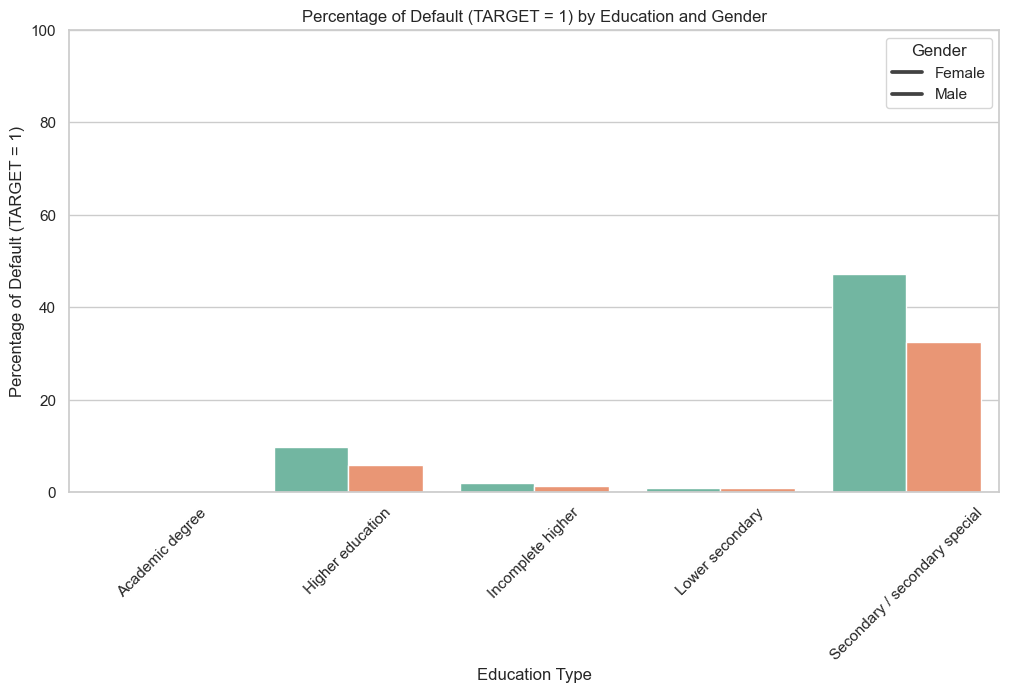

In [76]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'merged' is your DataFrame

# Filter the DataFrame for 'TARGET' value 1
merged_target_1 = merged[merged['TARGET'] == 1]

# Calculate the percentage of 'TARGET' value 1 for each combination of education type and gender
percentage_data = merged_target_1.groupby(['NAME_EDUCATION_TYPE', 'CODE_GENDER'])['TARGET'].count() / len(merged_target_1) * 100

# Reset the index to make 'NAME_EDUCATION_TYPE' and 'CODE_GENDER' columns
percentage_data = percentage_data.reset_index()

# Create the barplot
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
sns.barplot(data=percentage_data, x='NAME_EDUCATION_TYPE', hue='CODE_GENDER', y='TARGET', palette='Set2')

plt.title("Percentage of Default (TARGET = 1) by Education and Gender")
plt.xlabel("Education Type")
plt.ylabel("Percentage of Default (TARGET = 1)")
plt.ylim(0, 100)  # Set the y-axis limits from 0 to 100
plt.xticks(rotation=45)
plt.legend(title='Gender', labels=['Female', 'Male'])
plt.show()


In [ ]:
Percentage of educated female taking the loan ad not repaying back is more compared to the male. 

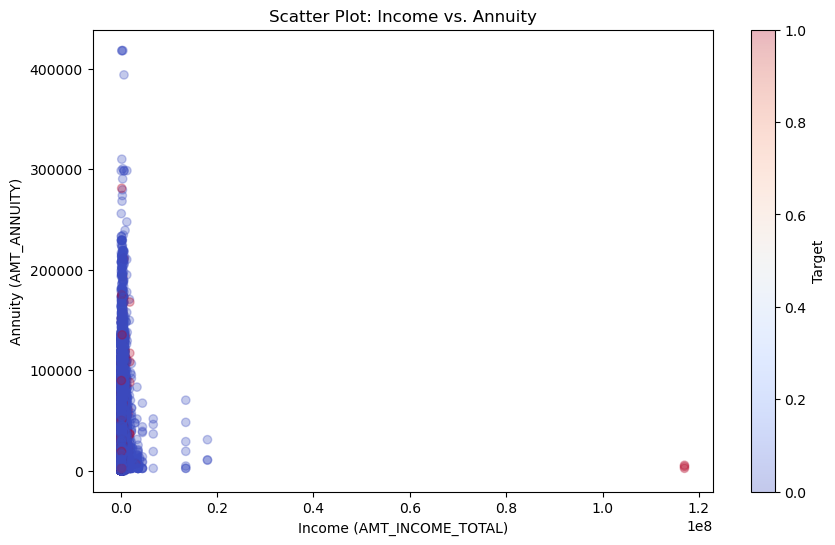

In [59]:
income = merged['AMT_INCOME_TOTAL']
annuity = merged['AMT_ANNUITY_y']

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(income, annuity, alpha=0.3, c=merged['TARGET'], cmap='coolwarm')
plt.xlabel('Income (AMT_INCOME_TOTAL)')
plt.ylabel('Annuity (AMT_ANNUITY)')
plt.title('Scatter Plot: Income vs. Annuity')
plt.colorbar(label='Target')
plt.show()

Annuity (AMT_ANNUITY) is concentrated more from 0 to 200000

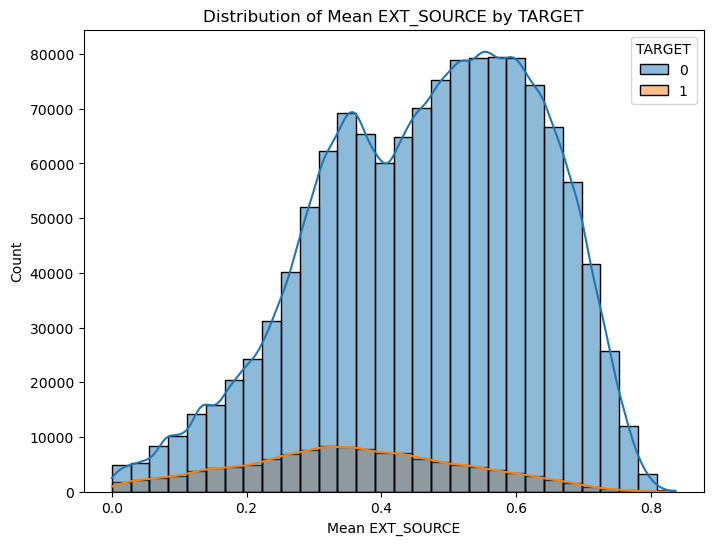

In [192]:
# Calculate the mean of 'EXT_SOURCE_1', 'EXT_SOURCE_2', and 'EXT_SOURCE_3'
merged['MEAN_EXT_SOURCE'] = merged[['EXT_SOURCE_2', 'EXT_SOURCE_3']].mean(axis=1)

# Plot 'MEAN_EXT_SOURCE' against 'TARGET'
plt.figure(figsize=(8, 6))
sns.histplot(data=merged, x='MEAN_EXT_SOURCE', hue='TARGET', kde=True, bins=30)
plt.title('Distribution of Mean EXT_SOURCE by TARGET')
plt.xlabel('Mean EXT_SOURCE')
plt.show()

## Insight
In the above bivariate plot of mean of normalized score from external data source,we observe that the number of non defaulters increased as  the score increased,till 0.6.

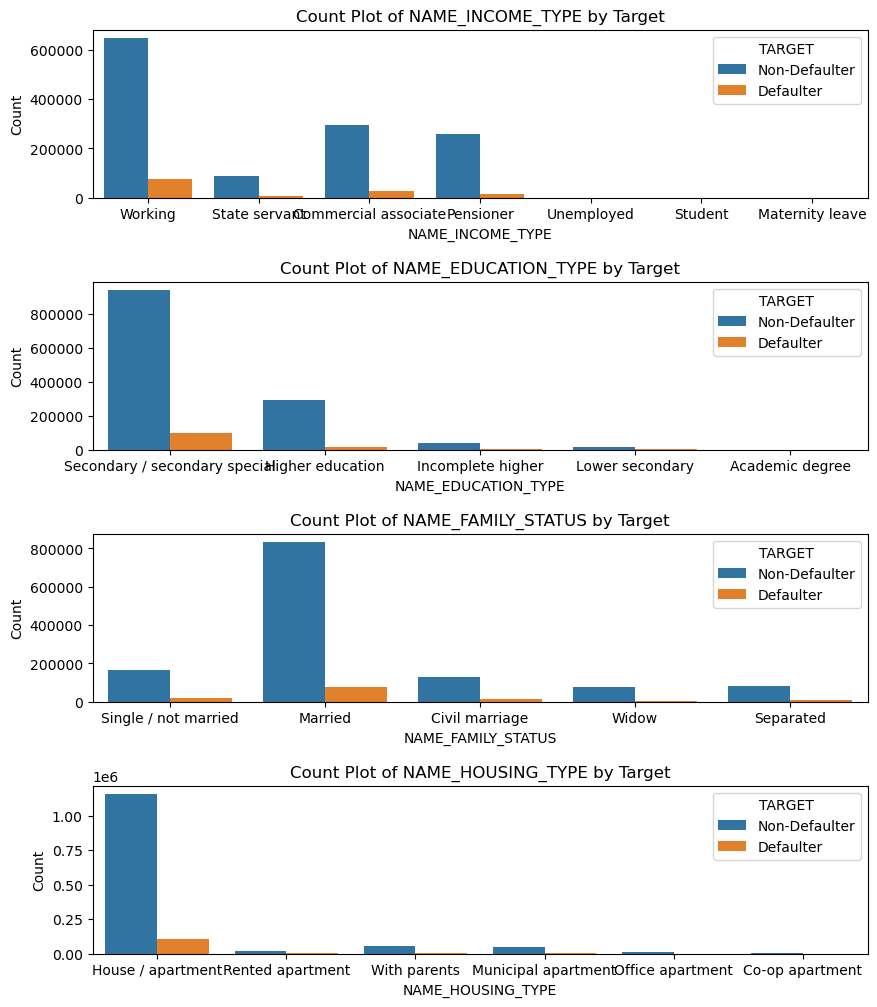

In [60]:
categorical_variables = ['NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE']

# Create subplots to display multiple count plots
fig, axes = plt.subplots(len(categorical_variables), 1, figsize=(10, 12))
plt.subplots_adjust(hspace=0.5)

# Generate count plots for each variable
for i, var in enumerate(categorical_variables):
    sns.countplot(data=merged, x=var, hue='TARGET', ax=axes[i])
    axes[i].set_title(f'Count Plot of {var} by Target')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Count')
    axes[i].legend(title='TARGET', labels=['Non-Defaulter', 'Defaulter'])

plt.show()

## Insight
1.In the first plot count of non-defaulter and defaulter is more from the working category.

2.In the second plot count of non-defaulter and defaulter is more from secondary education category.

3.In the third plot count of non-defaulter and defaulter is more from the married category.

4,In the fourth  plot count of non-defaulter and defaulter is more from the house and apartment category.
